In [1]:
import numpy as np
from scipy import misc
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread("../images/phantom.png",0)
img.shape

(480, 480)

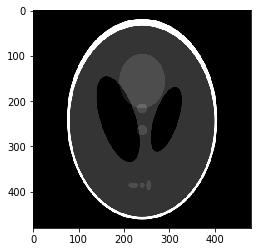

In [3]:
% matplotlib inline
plt.imshow(img, cmap="gray")

In [4]:
steps = 480
sinogram = np.zeros((steps, steps), dtype=np.float64)

In [5]:
for step in range(steps):
    rotation = misc.imrotate(img, -step*180/steps).astype('float64')
    sinogram[:,step] = sum(rotation)

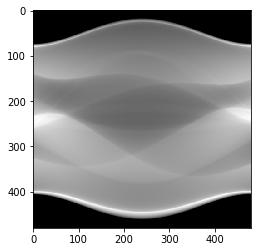

In [6]:
% matplotlib inline
plt.imshow(sinogram, cmap="gray")

In [15]:
diagonal = int(np.ceil(np.sqrt(2) * sinogram.shape[0]))
diagonal

679

In [16]:
pad = diagonal - sinogram.shape[0]
pad

199

In [17]:
old_center = sinogram.shape[0] // 2
old_center

240

In [18]:
new_center = diagonal // 2
new_center

339

In [19]:
pad_before = new_center - old_center
pad_before

99

In [27]:
pad_width = ((pad_before, pad - pad_before), (0, 0))
pad_width

((99, 100), (0, 0))

In [30]:
radon_image = np.pad(sinogram, pad_width, mode='constant', constant_values=0)
radon_imagth = (np.pi / 180.0) * thetae.shape

(679, 480)

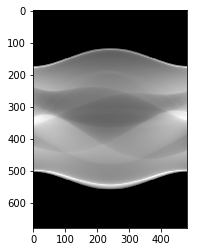

In [31]:
plt.imshow(radon_image,cmap = 'gray')

In [35]:
theta = np.linspace(0., 180., max(img.shape), endpoint=False)
theta

array([   0.   ,    0.375,    0.75 ,    1.125,    1.5  ,    1.875,
          2.25 ,    2.625,    3.   ,    3.375,    3.75 ,    4.125,
          4.5  ,    4.875,    5.25 ,    5.625,    6.   ,    6.375,
          6.75 ,    7.125,    7.5  ,    7.875,    8.25 ,    8.625,
          9.   ,    9.375,    9.75 ,   10.125,   10.5  ,   10.875,
         11.25 ,   11.625,   12.   ,   12.375,   12.75 ,   13.125,
         13.5  ,   13.875,   14.25 ,   14.625,   15.   ,   15.375,
         15.75 ,   16.125,   16.5  ,   16.875,   17.25 ,   17.625,
         18.   ,   18.375,   18.75 ,   19.125,   19.5  ,   19.875,
         20.25 ,   20.625,   21.   ,   21.375,   21.75 ,   22.125,
         22.5  ,   22.875,   23.25 ,   23.625,   24.   ,   24.375,
         24.75 ,   25.125,   25.5  ,   25.875,   26.25 ,   26.625,
         27.   ,   27.375,   27.75 ,   28.125,   28.5  ,   28.875,
         29.25 ,   29.625,   30.   ,   30.375,   30.75 ,   31.125,
         31.5  ,   31.875,   32.25 ,   32.625,   33.   ,   33.

In [38]:
th = (np.pi / 180.0) * theta
th

array([ 0.        ,  0.00654498,  0.01308997,  0.01963495,  0.02617994,
        0.03272492,  0.03926991,  0.04581489,  0.05235988,  0.05890486,
        0.06544985,  0.07199483,  0.07853982,  0.0850848 ,  0.09162979,
        0.09817477,  0.10471976,  0.11126474,  0.11780972,  0.12435471,
        0.13089969,  0.13744468,  0.14398966,  0.15053465,  0.15707963,
        0.16362462,  0.1701696 ,  0.17671459,  0.18325957,  0.18980456,
        0.19634954,  0.20289453,  0.20943951,  0.21598449,  0.22252948,
        0.22907446,  0.23561945,  0.24216443,  0.24870942,  0.2552544 ,
        0.26179939,  0.26834437,  0.27488936,  0.28143434,  0.28797933,
        0.29452431,  0.3010693 ,  0.30761428,  0.31415927,  0.32070425,
        0.32724923,  0.33379422,  0.3403392 ,  0.34688419,  0.35342917,
        0.35997416,  0.36651914,  0.37306413,  0.37960911,  0.3861541 ,
        0.39269908,  0.39924407,  0.40578905,  0.41233404,  0.41887902,
        0.42542401,  0.43196899,  0.43851397,  0.44505896,  0.45

In [39]:
projection_size_padded = max(64, int(2 ** np.ceil(np.log2(2 * radon_image.shape[0]))))
projection_size_padded

2048

In [41]:
pad_width = ((0, projection_size_padded - radon_image.shape[0]), (0, 0))
pad_width

((0, 1369), (0, 0))

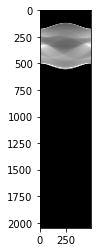

In [45]:
img = np.pad(radon_image, pad_width, mode='constant', constant_values=0)
img.shape
plt.imshow(img, cmap='gray')

In [53]:
from scipy.fftpack import fft, ifft, fftfreq
f = fftfreq(projection_size_padded).reshape(-1, 1)   # digital frequency
omega = 2 * np.pi * f                                # angular frequency
fourier_filter = 2 * np.abs(f)                       # ramp filter
fourier_filter

array([[ 0.        ],
       [ 0.00097656],
       [ 0.00195312],
       ..., 
       [ 0.00292969],
       [ 0.00195312],
       [ 0.00097656]])

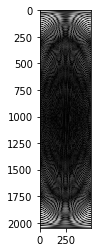

In [59]:
projection = fft(img, axis=0) * fourier_filter
plt.imshow((np.abs(projection)), cmap='gray')

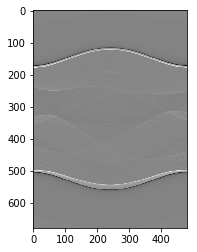

In [61]:
radon_filtered = np.real(ifft(projection, axis=0))
radon_filtered = radon_filtered[:radon_image.shape[0], :]
plt.imshow(radon_filtered, cmap='gray')

In [67]:
reconstructed = np.zeros((480, 480))
mid_index = radon_image.shape[0] // 2
[X, Y] = np.mgrid[0:480, 0:480]
xpr = X - int(480) // 2
ypr = Y - int(480) // 2
xpr

array([[-240, -240, -240, ..., -240, -240, -240],
       [-239, -239, -239, ..., -239, -239, -239],
       [-238, -238, -238, ..., -238, -238, -238],
       ..., 
       [ 237,  237,  237, ...,  237,  237,  237],
       [ 238,  238,  238, ...,  238,  238,  238],
       [ 239,  239,  239, ...,  239,  239,  239]])

In [69]:
for i in range(len(theta)):
        t = ypr * np.cos(th[i]) - xpr * np.sin(th[i])
        x = np.arange(radon_filtered.shape[0]) - mid_index
        backprojected = np.interp(t, x, radon_filtered[:, i], left=0, right=0)
        reconstructed += backprojected            

In [70]:
radius = 480 // 2
reconstruction_circle = (xpr ** 2 + ypr ** 2) <= radius ** 2
reconstructed[~reconstruction_circle] = 0.

In [ ]:
outreconstructed * np.pi / (2 * len(th))